# River, Well system and Solute Transport Model

![River Base Concept Model](river_and_wells.svg)

# Example description
### Spatial configuration
There is two simulated aquifer which are separted by an aquitard. The model grid consists of 15 rows, 10 columns, and 3 layers.  Uniform grid spacing with a row and column width of 100.0 meters. The top layer is positioned at an elevation of 15.0 meters, while the bottom layers are situated at elevations of -5.0, -10.0, and -15.0 meters, respectively.
### Temporal discretization
The model is designed for a simulation period of 10 days, divided into 120 time steps per stress period, with a time step multiplier of 1.0. The simulation is repeated for a total of 3 periods. The model operates in days as time units and meters as length units.
### Layer Hydraulic properties 
Initial hydraulic conductivity values for the three layers are set at 0.5, 0.000006, and 0.5, respectively.
The vertical anisotropy ratios for the layers are specified as 0.1, 0.2, and 0.3, indicating differences in hydraulic conductivity in the vertical direction. 
### Storage properties 
The specific yield is set at 0.2, representing the volumetric ratio of water that drains under the influence of gravity.The specific storage is specified as 0.000001, representing the compressibility of the aquifer.
### Flow Boundary Conditions 
The model starts with an initial hydraulic head of 10.0 meters across the entire domain. 
Two constant head boundaries are established at specific locations: one at the intersection of the first layer, first row, and first column and another at the intersection of the last layer, last row, and last column, each set at a constant head of 10.0 meters.
### River Boundary Conditions 
rivlay: Specifies the layer number for each river cell. In this case, all river cells are situated in Layer 0, denoting their vertical position within the aquifer system.
rivrow and rivcol: Arrays indicating the horizontal positions of the river cells in terms of rows and columns within the model grid.
rivstg: Represents the stage or water level of each river cell. The values gradually vary between 13 and 14 across the river cells.
rivbot: Defines the elevation of the river bottom for each corresponding river cell, showing a variation between elevations of 7 and 10.
rivcnd: Indicates the conductance values associated with the river cells. In this case, a uniform conductance value of 0.05 is assigned to all river cells.
### Solute transport conditions 
The initial concentration of the substance being transported within the groundwater system set to 1.
The model simulates a point source contamination: at cell (Layer 0, Row 5, Column 1), the initial concentration is set to 10.
Similarly, at cell (Layer 0, Row 6, Column 1), the initial concentration is also set to 10.
### Well Boundary Conditions 
The 3 wells are located at (0, 4, 4), (0, 6, 4) and (0, 8,4); and all wells only reaching the first layer (=0). 
Discharge or pumping rates associated with the wells are -0.05 (m/d) on the first time-period, -0.5 for the second and -0.05 for the third.

# Start setting up the model 

### Magic commands - auto reload of the model each time 

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

### Import from pymf6tools the functions to run, get and visualize simulation results

In [4]:
from pathlib import Path

import numpy as np 

from pymf6_tools.make_model import run_simulation, get_simulation
from pymf6_tools.plotting import (
    show_heads, show_well_head, show_concentration, show_bcs, 
    show_bot_elevations, contour_bot_elevations, plot_spec_discharge, 
    show_concentration, contour_well_heads, show_river_stages)

## Set model path and name 

In [5]:
model_path = Path('models/transport_river_base').absolute()
model_name = 'transriver'

## Run simulation

In [6]:
run_simulation(model_path)

### Inspect visualization tools

In [7]:
show_well_head?

Signature:
show_well_head(
    wel_coords,
    model_path,
    model_name,
    times,
    title='',
    y_start=0.3,
    y_end=1.05,
    upper_head_limit=None,
    lower_head_limit=None,
    x=(0, 32),
)
Docstring: Plot head at well over time.
File:      ~/Dev/pymf6-validation/.pixi/envs/default/lib/python3.13/site-packages/pymf6_tools/plotting.py
Type:      function

### Inspect the parameters by importing the model results 

In [11]:
sim = get_simulation(model_path, model_name)
ml = sim.get_model('gwf_' + model_name)
wel = ml.get_package('wel') 
riv = ml.get_package('riv')

In [12]:
wel.data_list

[{internal}
 (rec.array([('auxiliary', 'concentration')],
           dtype=[('auxiliary_0', 'O'), ('auxiliary_1', 'O')])),
 ,
 ,
 ,
 ,
 ,
 ,
 ,
 ,
 ,
 ,
 {internal}
 (3),
 {internal}
 (   cellid_layer  cellid_row  cellid_column     q  concentration
 0             0           4              4 -0.05              0
 1             0           6              4 -0.05              0
 2             0           8              4 -0.05              0)
 ...
 and 2 additional data blocks]

In [13]:
riv_data = riv.data_list[-1]

In [14]:
import pandas as pd

In [15]:
df = pd.DataFrame(riv_data.array[0])
riv_table = df.set_index('cellid')

In [16]:
riv_table.iloc[0]

stage    13.00
cond      0.05
rbot      7.00
Name: (0, 1, 0), dtype: float64

In [17]:
riv_table.index[0]

(0, 1, 0)

In [18]:
riv_table.loc[[(0, 1, 0)]]

,stage,cond,rbot
cellid,,,
"(0, 1, 0)",13.0,0.05,7.0


In [19]:
riv_table

,stage,cond,rbot
cellid,,,
"(0, 1, 0)",13.000000,0.05,7.000000
"(0, 1, 2)",13.090909,0.05,7.272727
"(0, 2, 1)",13.181818,0.05,7.545455
"(0, 3, 2)",13.272727,0.05,7.818182
"(0, 4, 3)",13.363636,0.05,8.090909
"(0, 5, 3)",13.454546,0.05,8.363636
"(0, 4, 4)",13.545454,0.05,8.636364
"(0, 5, 5)",13.636364,0.05,8.909091
"(0, 6, 6)",13.727273,0.05,9.181818


## Visualization of Input and Output - e.g. Boundary conditions and Heads 

### Boundary Conditions 
Note that you should change the "bc_names" according to the boundary conditions present in the simulation.  
<span style="color:blue">'chd'</span> Constant-head boundary  
<span style="color:blue">'wel'</span> Well boundary  
<span style="color:blue">'riv-1'</span> River boundary

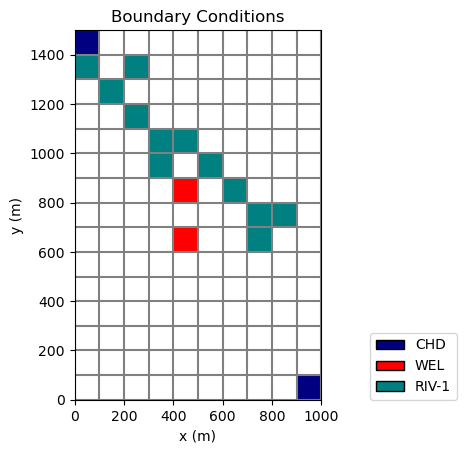

In [20]:
show_bcs(model_path, model_name, bc_names=('chd', 'wel', 'riv-1'))

### Bottom elevation of the layers - Interactive graph (top, bottom and layer)
max_top: maximum elevation of the layer selected  
max_botm: maximum depth of the layer selected  
layer: choose layer of the model 

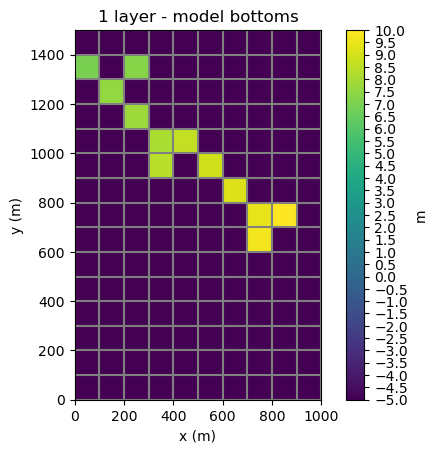

In [21]:
show_bot_elevations(model_path, model_name, max_top=15., max_botm=-15., layer=1)

### Specific Discharge - Interactive graph (layer and time)
Specify the layer and time of the simulation to be visualized.

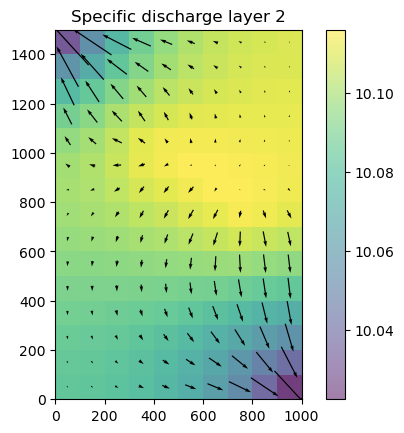

In [22]:
plot_spec_discharge(model_path, model_name, layer=2, times = 300)

### Bottom elevations with Countour lines - Interactive grapgh (layer) 
Specify the layer to be visualized.

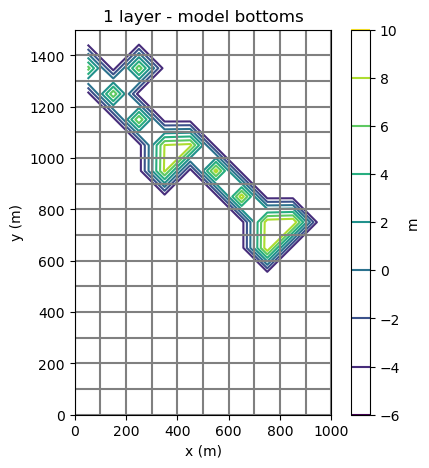

In [23]:
contour_bot_elevations(model_path, model_name, max_top= -15, max_botm=15, layer=1)

### River Stage - Interactive graph (layer and time)
Specify the layer and the time to visualize.

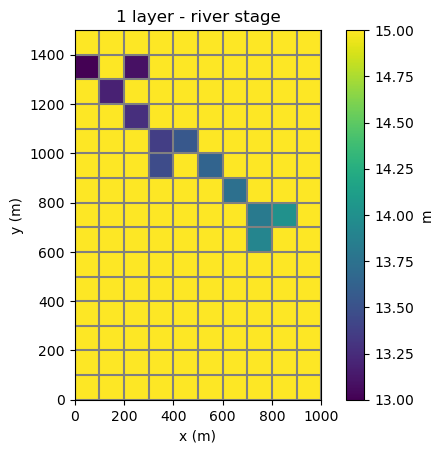

In [24]:
show_river_stages(model_path, model_name, layer=1, time_period=3)

### Groundwater level 

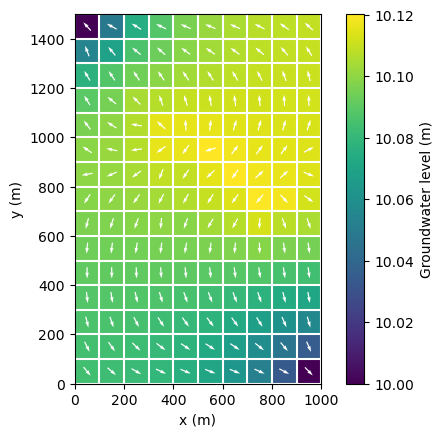

In [25]:
show_heads(model_path, model_name, show_wells=False)

### Heads with countour lines

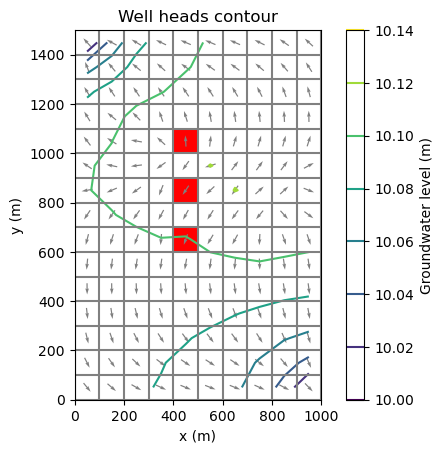

In [26]:
contour_well_heads(model_path, model_name, title="Well heads contour")

### Well Head along time 
Specify well coordinates and the times to visualize. 

<Axes: xlabel='Time (d)', ylabel='Groundwater level (m)'>

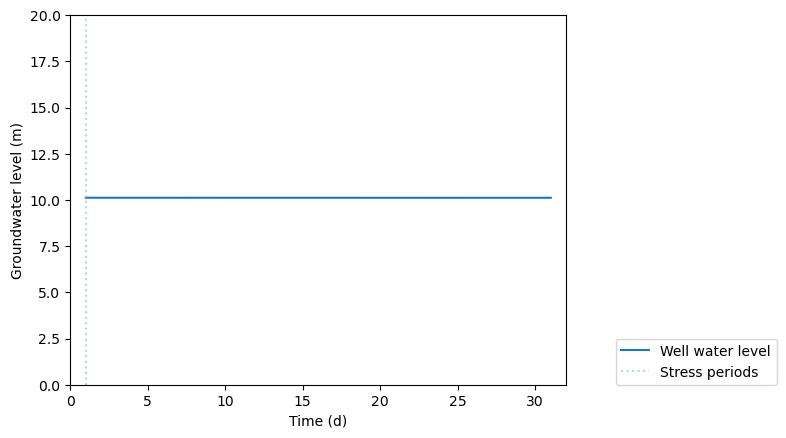

In [28]:
show_well_head((0, 4, 4), model_path, model_name, times=[1], y_start=0, y_end=20)

### Concentration 
<span style="color:blue">levels:</span> Set the amount of intervals between the minimum and the maximum concentration  
<span style="color:blue">kstkper:</span> set the time-step to retrieve the concentration results  
<span style="color:blue">show_wells:</span> Boolean to show boundary conditions 
<span style="color:blue">vmin and vmax:</span> minimum and maximum values  
<span style="color:blue">show_countours:</span> Boolean to show countours on top of the graph  
<span style="color:blue">show_arrows:</span> Boolean to show specific discharge

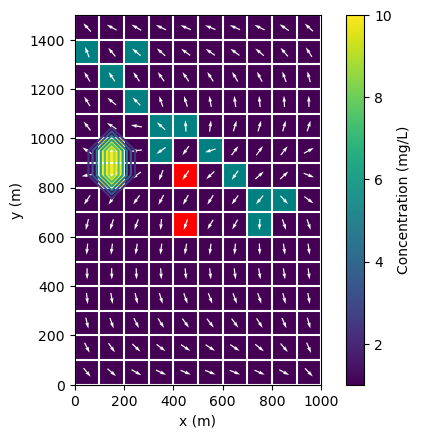

In [29]:
show_concentration(model_path, model_name, show_arrows=True)